In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((512, 4))

In [3]:
mice.lookup

{
    'ca2': {
        0: '1-29-0',
        1: '1-30-0',
        2: '1-35-0',
        3: '1-36-0',
        4: '1-41-0',
        5: '1-43-0',
        6: '1-44-0',
        7: '1-45-0',
        8: '1-46-0',
        9: '1-51-0',
        10: '1-52-0',
        11: '1-53-0',
        12: '1-54-0',
        13: '1-55-0',
        14: '1-56-0',
        15: '1-57-0',
        16: '1-59-0',
        17: '1-60-0',
        18: '1-61-0',
        19: '1-66-0',
        20: '1-68-0',
        21: '1-69-0',
        22: '1-70-0',
        23: '1-71-0',
        24: '1-72-0',
        25: '1-73-0',
        26: '1-74-0',
        27: '1-75-0',
        28: '1-77-0',
        29: '1-78-0',
        30: '1-79-0',
        31: '1-80-0',
        32: '1-84-0',
        33: '1-86-0',
        34: '1-89-0',
        35: '1-91-0',
        36: '1-93-0',
        37: '1-94-0',
        38: '1-95-0',
        39: '1-96-0',
        40: '1-97-0',
        41: '1-98-0',
        42: '1-100-0',
        43: '1-101-0',
        44: '1-102-0',
        45: '1-103-0',
        46: '1-108-0',
        47: '1-110-0',
        48: '1-112-0',
        49: '1-114-0',
        50: '1-115-0',
        51: '1-116-0',
        52: '1-117-0',
        53: '1-118-0',
        54: '1-119-0',
        55: '1-120-0',
        56: '1-121-0',
        57: '1-122-0',
        58: '1-123-0',
        59: '1-126-0',
        60: '1-132-0',
        61: '1-133-0',
        62: '1-134-0',
        63: '1-137-0',
        64: '1-138-0',
        65: '1-139-0',
        66: '1-141-0',
        67: '1-142-0',
        68: '1-143-0',
        69: '1-144-0',
        70: '1-145-0',
        71: '1-146-0',
        72: '1-147-0',
        73: '1-149-0',
        74: '1-151-0',
        75: '1-157-0',
        76: '1-158-0',
        77: '1-159-0',
        78: '1-160-0',
        79: '1-163-0',
        80: '1-166-0',
        81: '1-167-0',
        82: '1-168-0',
        83: '1-169-0',
        84: '1-170-0',
        85: '1-171-0',
        86: '1-173-0',
        87: '1-175-0',
        88: '1-176-0',
        89: '1-178-0',
        90: '1-179-0',
        91: '1-182-0',
        92: '1-183-0',
        93: '1-184-0',
        94: '1-185-0',
        95: '1-186-0',
        96: '1-188-0',
        97: '1-190-0',
        98: '1-191-0',
        99: '1-194-0',
        100: '1-195-0',
        101: '1-197-0',
        102: '1-198-0',
        103: '1-199-0',
        104: '1-201-0',
        105: '1-202-0',
        106: '1-203-0',
        107: '1-204-0',
        108: '1-205-0',
        109: '1-206-0',
        110: '1-208-0',
        111: '1-210-0',
        112: '1-212-0',
        113: '1-213-0',
        114: '1-214-0',
        115: '1-217-0',
        116: '1-218-0',
        117: '1-220-0',
        118: '1-221-0',
        119: '1-223-0',
        120: '1-224-0',
        121: '1-225-0',
        122: '1-227-0',
        123: '1-228-0',
        124: '1-229-0',
        125: '1-230-0',
        126: '1-232-0',
        127: '1-234-0',
        128: '1-235-0',
        129: '1-237-0',
        130: '1-238-0',
        131: '1-240-0',
        132: '1-242-0',
        133: '1-243-0',
        134: '1-244-0',
        135: '1-246-0',
        136: '1-247-0',
        137: '1-248-0',
        138: '1-249-0',
        139: '1-252-0',
        140: '1-254-0',
        141: '1-255-0',
        142: '1-256-0',
        143: '1-259-0',
        144: '1-260-0',
        145: '1-261-0',
        146: '1-263-0',
        147: '1-264-0',
        148: '1-265-0',
        149: '1-268-0',
        150: '1-269-0',
        151: '1-270-0',
        152: '1-271-0',
        153: '1-272-0',
        154: '1-274-0',
        155: '1-275-0',
        156: '1-276-0',
        157: '1-278-0',
        158: '1-280-0',
        159: '1-282-0',
        160: '1-283-0',
        161: '1-284-0',
        162: '1-286-0',
        163: '1-287-0',
        164: '1-288-0',
        165: '1-289-0',
        166: '1-290-0',
        167: '1-294-0',
        168: '1-295-0',
        169: '1-297-0',
        170: '1-298-0',
        171: '1-299-0',
        1

In [3]:
from register.register import Register

In [ ]:
reg = Register(mice)

In [10]:
reg.set_mode('2d')
acc = reg.get_accepted_regions(0.1)

Name: cortex-merged . . . a total of 386 regions were accepted.
accept ratio: 78 %, reject ratio: 22 %, using a presence threshold of 10.0 %

In [12]:
list(acc)

['cortex-merged']

In [19]:
type(acc.get('subcortex'))

<class 'NoneType'>

In [13]:
regions_ranked = mice.parcel.rank_order_regions(acc['cortex-merged'], acc.get('subcortex'))
regions_ranked

[
    '1-17-0',
    '1-20-0',
    '1-22-0',
    '1-23-0',
    '1-24-0',
    '1-25-0',
    '1-27-0',
    '1-29-0',
    '1-31-0',
    '1-32-0',
    '1-33-0',
    '1-34-0',
    '1-35-0',
    '1-37-0',
    '1-39-0',
    '1-41-0',
    '1-42-0',
    '1-44-0',
    '1-45-0',
    '1-48-0',
    '1-49-0',
    '1-50-0',
    '1-53-0',
    '1-54-0',
    '1-55-0',
    '1-57-0',
    '1-58-0',
    '1-59-0',
    '1-62-0',
    '1-67-0',
    '1-68-0',
    '1-69-0',
    '1-70-0',
    '1-71-0',
    '1-72-0',
    '1-73-0',
    '1-74-0',
    '1-76-0',
    '1-80-0',
    '1-83-0',
    '1-84-0',
    '1-85-0',
    '1-86-0',
    '1-87-0',
    '1-88-0',
    '1-89-0',
    '1-90-0',
    '1-93-0',
    '1-94-0',
    '1-97-0',
    '1-98-0',
    '1-100-0',
    '1-101-0',
    '1-102-0',
    '1-103-0',
    '1-104-0',
    '1-105-0',
    '1-107-0',
    '1-108-0',
    '1-109-0',
    '1-110-0',
    '1-112-0',
    '1-114-0',
    '1-116-0',
    '1-118-0',
    '1-119-0',
    '1-120-0',
    '1-121-0',
    '1-123-0',
    '1-124-0',
    '1-125-0',
    '1-126-0',
    '1-127-0',
    '1-131-0',
    '1-132-0',
    '1-134-0',
    '1-134-1',
    '1-135-0',
    '1-136-0',
    '1-137-0',
    '1-138-0',
    '1-139-0',
    '1-141-0',
    '1-142-0',
    '1-143-0',
    '1-146-0',
    '1-147-0',
    '1-148-0',
    '1-150-0',
    '1-152-0',
    '1-153-0',
    '1-155-0',
    '1-156-0',
    '1-157-0',
    '1-158-0',
    '1-159-0',
    '1-160-0',
    '1-161-0',
    '1-164-0',
    '1-165-0',
    '1-166-0',
    '1-166-1',
    '1-167-0',
    '1-167-1',
    '1-170-0',
    '1-171-0',
    '1-173-0',
    '1-174-0',
    '1-175-0',
    '1-176-0',
    '1-176-1',
    '1-177-0',
    '1-180-0',
    '1-181-0',
    '1-181-1',
    '1-182-0',
    '1-182-1',
    '1-183-0',
    '1-184-0',
    '1-185-0',
    '1-185-1',
    '1-186-0',
    '1-187-0',
    '1-187-1',
    '1-189-0',
    '1-190-0',
    '1-190-1',
    '1-191-0',
    '1-192-0',
    '1-192-1',
    '1-195-0',
    '1-196-0',
    '1-197-0',
    '1-197-1',
    '1-198-0',
    '1-199-0',
    '1-199-1',
    '1-201-0',
    '1-202-0',
    '1-203-0',
    '1-203-1',
    '1-205-0',
    '1-207-0',
    '1-207-1',
    '1-208-0',
    '1-209-0',
    '1-209-1',
    '1-210-0',
    '1-211-0',
    '1-213-0',
    '1-213-1',
    '1-214-0',
    '1-215-0',
    '1-215-1',
    '1-217-0',
    '1-218-0',
    '1-218-1',
    '1-219-0',
    '1-220-0',
    '1-221-0',
    '1-221-1',
    '1-223-0',
    '1-224-0',
    '1-224-1',
    '1-225-0',
    '1-226-0',
    '1-227-0',
    '1-227-1',
    '1-228-0',
    '1-229-0',
    '1-229-1',
    '1-230-0',
    '1-230-1',
    '1-232-0',
    '1-233-0',
    '1-234-0',
    '1-235-0',
    '1-235-1',
    '1-236-0',
    '1-237-0',
    '1-237-1',
    '1-238-0',
    '1-240-0',
    '1-241-0',
    '1-241-1',
    '1-242-0',
    '1-243-0',
    '1-244-0',
    '1-245-0',
    '1-247-0',
    '1-248-0',
    '1-249-0',
    '1-250-0',
    '2-17-0',
    '2-20-0',
    '2-22-0',
    '2-23-0',
    '2-24-0',
    '2-25-0',
    '2-27-0',
    '2-29-0',
    '2-31-0',
    '2-32-0',
    '2-33-0',
    '2-34-0',
    '2-35-0',
    '2-37-0',
    '2-39-0',
    '2-41-0',
    '2-42-0',
    '2-44-0',
    '2-45-0',
    '2-48-0',
    '2-49-0',
    '2-50-0',
    '2-53-0',
    '2-54-0',
    '2-55-0',
    '2-57-0',
    '2-58-0',
    '2-59-0',
    '2-62-0',
    '2-67-0',
    '2-68-0',
    '2-69-0',
    '2-70-0',
    '2-71-0',
    '2-72-0',
    '2-73-0',
    '2-74-0',
    '2-76-0',
    '2-80-0',
    '2-83-0',
    '2-84-0',
    '2-85-0',
    '2-86-0',
    '2-87-0',
    '2-88-0',
    '2-89-0',
    '2-90-0',
    '2-93-0',
    '2-94-0',
    '2-97-0',
    '2-98-0',
    '2-100-0',
    '2-101-0',
    '2-102-0',
    '2-103-0',
    '2-104-0',
    '2-105-0',
    '2-107-0',
    '2-108-0',
    '2-109-0',
    '2-110-0',
    '2-112-0',
    '2-114-0',
    '2-116-0',
    '2-118-0',
    '2-119-0',
    '2-120-0',
    '2-121-0',
    '2-123-0',
    '2-124-0',
    '2-125-0',
    '2-126-0',
    '2-127-0',
    '2-131-0',
    '2-132-0',
    '2-134-0',
    '2-134-1',
    '2-135-0',
    '2-136-0',
    '2-137-0',
    '

In [26]:
frozenset(regions_ranked)

frozenset({
    '2-146-0',
    '2-125-0',
    '2-156-0',
    '2-198-0',
    '1-238-0',
    '2-20-0',
    '2-177-0',
    '2-116-0',
    '1-85-0',
    '2-109-0',
    '2-152-0',
    '2-227-1',
    '1-74-0',
    '1-223-0',
    '1-213-1',
    '2-31-0',
    '1-191-0',
    '1-165-0',
    '2-102-0',
    '2-213-0',
    '1-176-1',
    '1-126-0',
    '1-195-0',
    '1-187-0',
    '2-214-0',
    '1-119-0',
    '2-237-1',
    '2-157-0',
    '2-55-0',
    '2-153-0',
    '2-70-0',
    '2-166-0',
    '2-158-0',
    '1-33-0',
    '1-101-0',
    '2-186-0',
    '2-237-0',
    '1-152-0',
    '1-76-0',
    '1-158-0',
    '2-121-0',
    '1-23-0',
    '1-110-0',
    '1-141-0',
    '2-176-1',
    '2-220-0',
    '1-217-0',
    '1-225-0',
    '2-53-0',
    '2-225-0',
    '1-120-0',
    '1-134-1',
    '2-240-0',
    '2-185-1',
    '2-249-0',
    '1-192-0',
    '2-181-0',
    '2-59-0',
    '2-209-0',
    '1-202-0',
    '2-134-1',
    '2-173-0',
    '1-139-0',
    '2-22-0',
    '1-89-0',
    '2-100-0',
    '2-42-0',
    '2-110-0',
    '1-196-0',
    '2-201-0',
    '2-244-0',
    '1-53-0',
    '1-157-0',
    '1-247-0',
    '1-186-0',
    '2-191-0',
    '2-241-0',
    '1-112-0',
    '1-156-0',
    '1-72-0',
    '1-190-1',
    '2-84-0',
    '1-147-0',
    '1-244-0',
    '2-93-0',
    '1-240-0',
    '2-181-1',
    '1-175-0',
    '2-226-0',
    '2-119-0',
    '1-116-0',
    '2-228-0',
    '1-42-0',
    '2-161-0',
    '2-105-0',
    '2-199-0',
    '1-237-1',
    '1-237-0',
    '1-224-0',
    '1-214-0',
    '2-209-1',
    '2-207-1',
    '1-235-1',
    '2-182-1',
    '1-203-1',
    '2-232-0',
    '2-247-0',
    '2-159-0',
    '2-148-0',
    '1-213-0',
    '2-166-1',
    '2-189-0',
    '1-221-0',
    '1-185-0',
    '2-221-1',
    '2-85-0',
    '1-229-0',
    '1-166-1',
    '2-35-0',
    '2-54-0',
    '1-41-0',
    '2-248-0',
    '2-197-0',
    '2-62-0',
    '1-241-0',
    '1-233-0',
    '1-167-0',
    '2-192-1',
    '2-71-0',
    '1-173-0',
    '2-138-0',
    '2-87-0',
    '1-68-0',
    '2-207-0',
    '2-227-0',
    '1-22-0',
    '1-235-0',
    '2-223-0',
    '2-86-0',
    '1-192-1',
    '2-199-1',
    '1-37-0',
    '2-135-0',
    '2-250-0',
    '1-58-0',
    '2-37-0',
    '2-195-0',
    '1-224-1',
    '1-45-0',
    '1-230-1',
    '1-249-0',
    '2-180-0',
    '1-198-0',
    '1-220-0',
    '2-68-0',
    '1-138-0',
    '1-62-0',
    '1-228-0',
    '1-185-1',
    '1-236-0',
    '2-23-0',
    '1-142-0',
    '1-170-0',
    '1-199-0',
    '1-205-0',
    '2-183-0',
    '2-205-0',
    '2-139-0',
    '1-208-0',
    '2-136-0',
    '1-84-0',
    '2-57-0',
    '1-54-0',
    '1-164-0',
    '2-41-0',
    '1-199-1',
    '1-218-1',
    '1-174-0',
    '2-131-0',
    '2-217-0',
    '1-17-0',
    '1-31-0',
    '1-32-0',
    '2-39-0',
    '2-219-0',
    '1-197-1',
    '1-70-0',
    '1-105-0',
    '2-233-0',
    '1-49-0',
    '1-215-1',
    '2-235-1',
    '2-49-0',
    '1-203-0',
    '1-182-0',
    '2-126-0',
    '2-137-0',
    '1-218-0',
    '1-167-1',
    '2-27-0',
    '1-104-0',
    '1-227-1',
    '2-127-0',
    '2-190-1',
    '1-132-0',
    '1-102-0',
    '2-34-0',
    '2-235-0',
    '1-227-0',
    '2-118-0',
    '1-87-0',
    '1-159-0',
    '1-123-0',
    '1-181-0',
    '1-127-0',
    '1-109-0',
    '1-34-0',
    '1-35-0',
    '1-125-0',
    '1-190-0',
    '2-101-0',
    '2-221-0',
    '2-114-0',
    '1-215-0',
    '2-83-0',
    '2-203-1',
    '2-241-1',
    '2-176-0',
    '2-150-0',
    '2-202-0',
    '2-224-1',
    '1-80-0',
    '1-177-0',
    '1-232-0',
    '1-234-0',
    '2-208-0',
    '1-248-0',
    '1-176-0',
    '1-207-1',
    '1-209-1',
    '2-33-0',
    '2-236-0',
    '1-150-0',
    '1-166-0',
    '2-167-0',
    '2-112-0',
    '2-97-0',
    '1-97-0',
    '2-238-0',
    '1-211-0',
    '1-181-1',
    '2-69-0',
    '2-229-0',
    '2-76-0',
    '2-29-0',
    '1-90-0',
    '1-108-0',
    '2-210-0',
    '2-215-1',
    '2-234-0',
    '1-121-0',
    '1-25-0',
    '2-107-0',
    '1-207-0',
    '2-73-0',
    '1-107-0',
    '1-230-0',
    '1-209-0',
    '2-185-0',
    '2-89-0',
  

In [14]:
mice.setup_dfs('ca2')

In [15]:
previous = mice.ca_dfs['sub-SLC02_ses-2_run-5'].columns.tolist()

In [16]:
regions_ranked == previous

True

In [17]:
regions_ranked

[
    '1-17-0',
    '1-20-0',
    '1-22-0',
    '1-23-0',
    '1-24-0',
    '1-25-0',
    '1-27-0',
    '1-29-0',
    '1-31-0',
    '1-32-0',
    '1-33-0',
    '1-34-0',
    '1-35-0',
    '1-37-0',
    '1-39-0',
    '1-41-0',
    '1-42-0',
    '1-44-0',
    '1-45-0',
    '1-48-0',
    '1-49-0',
    '1-50-0',
    '1-53-0',
    '1-54-0',
    '1-55-0',
    '1-57-0',
    '1-58-0',
    '1-59-0',
    '1-62-0',
    '1-67-0',
    '1-68-0',
    '1-69-0',
    '1-70-0',
    '1-71-0',
    '1-72-0',
    '1-73-0',
    '1-74-0',
    '1-76-0',
    '1-80-0',
    '1-83-0',
    '1-84-0',
    '1-85-0',
    '1-86-0',
    '1-87-0',
    '1-88-0',
    '1-89-0',
    '1-90-0',
    '1-93-0',
    '1-94-0',
    '1-97-0',
    '1-98-0',
    '1-100-0',
    '1-101-0',
    '1-102-0',
    '1-103-0',
    '1-104-0',
    '1-105-0',
    '1-107-0',
    '1-108-0',
    '1-109-0',
    '1-110-0',
    '1-112-0',
    '1-114-0',
    '1-116-0',
    '1-118-0',
    '1-119-0',
    '1-120-0',
    '1-121-0',
    '1-123-0',
    '1-124-0',
    '1-125-0',
    '1-126-0',
    '1-127-0',
    '1-131-0',
    '1-132-0',
    '1-134-0',
    '1-134-1',
    '1-135-0',
    '1-136-0',
    '1-137-0',
    '1-138-0',
    '1-139-0',
    '1-141-0',
    '1-142-0',
    '1-143-0',
    '1-146-0',
    '1-147-0',
    '1-148-0',
    '1-150-0',
    '1-152-0',
    '1-153-0',
    '1-155-0',
    '1-156-0',
    '1-157-0',
    '1-158-0',
    '1-159-0',
    '1-160-0',
    '1-161-0',
    '1-164-0',
    '1-165-0',
    '1-166-0',
    '1-166-1',
    '1-167-0',
    '1-167-1',
    '1-170-0',
    '1-171-0',
    '1-173-0',
    '1-174-0',
    '1-175-0',
    '1-176-0',
    '1-176-1',
    '1-177-0',
    '1-180-0',
    '1-181-0',
    '1-181-1',
    '1-182-0',
    '1-182-1',
    '1-183-0',
    '1-184-0',
    '1-185-0',
    '1-185-1',
    '1-186-0',
    '1-187-0',
    '1-187-1',
    '1-189-0',
    '1-190-0',
    '1-190-1',
    '1-191-0',
    '1-192-0',
    '1-192-1',
    '1-195-0',
    '1-196-0',
    '1-197-0',
    '1-197-1',
    '1-198-0',
    '1-199-0',
    '1-199-1',
    '1-201-0',
    '1-202-0',
    '1-203-0',
    '1-203-1',
    '1-205-0',
    '1-207-0',
    '1-207-1',
    '1-208-0',
    '1-209-0',
    '1-209-1',
    '1-210-0',
    '1-211-0',
    '1-213-0',
    '1-213-1',
    '1-214-0',
    '1-215-0',
    '1-215-1',
    '1-217-0',
    '1-218-0',
    '1-218-1',
    '1-219-0',
    '1-220-0',
    '1-221-0',
    '1-221-1',
    '1-223-0',
    '1-224-0',
    '1-224-1',
    '1-225-0',
    '1-226-0',
    '1-227-0',
    '1-227-1',
    '1-228-0',
    '1-229-0',
    '1-229-1',
    '1-230-0',
    '1-230-1',
    '1-232-0',
    '1-233-0',
    '1-234-0',
    '1-235-0',
    '1-235-1',
    '1-236-0',
    '1-237-0',
    '1-237-1',
    '1-238-0',
    '1-240-0',
    '1-241-0',
    '1-241-1',
    '1-242-0',
    '1-243-0',
    '1-244-0',
    '1-245-0',
    '1-247-0',
    '1-248-0',
    '1-249-0',
    '1-250-0',
    '2-17-0',
    '2-20-0',
    '2-22-0',
    '2-23-0',
    '2-24-0',
    '2-25-0',
    '2-27-0',
    '2-29-0',
    '2-31-0',
    '2-32-0',
    '2-33-0',
    '2-34-0',
    '2-35-0',
    '2-37-0',
    '2-39-0',
    '2-41-0',
    '2-42-0',
    '2-44-0',
    '2-45-0',
    '2-48-0',
    '2-49-0',
    '2-50-0',
    '2-53-0',
    '2-54-0',
    '2-55-0',
    '2-57-0',
    '2-58-0',
    '2-59-0',
    '2-62-0',
    '2-67-0',
    '2-68-0',
    '2-69-0',
    '2-70-0',
    '2-71-0',
    '2-72-0',
    '2-73-0',
    '2-74-0',
    '2-76-0',
    '2-80-0',
    '2-83-0',
    '2-84-0',
    '2-85-0',
    '2-86-0',
    '2-87-0',
    '2-88-0',
    '2-89-0',
    '2-90-0',
    '2-93-0',
    '2-94-0',
    '2-97-0',
    '2-98-0',
    '2-100-0',
    '2-101-0',
    '2-102-0',
    '2-103-0',
    '2-104-0',
    '2-105-0',
    '2-107-0',
    '2-108-0',
    '2-109-0',
    '2-110-0',
    '2-112-0',
    '2-114-0',
    '2-116-0',
    '2-118-0',
    '2-119-0',
    '2-120-0',
    '2-121-0',
    '2-123-0',
    '2-124-0',
    '2-125-0',
    '2-126-0',
    '2-127-0',
    '2-131-0',
    '2-132-0',
    '2-134-0',
    '2-134-1',
    '2-135-0',
    '2-136-0',
    '2-137-0',
    '

In [22]:
x = mice.ca['sub-SLC01_ses-1_run-1'].get_data()

In [24]:
mice.cfg.main_dir

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4'

In [36]:
mice.parcel.check_symmetry(mice.parcel.encode(hcl))

num regions,    left: 873,  right: 873
region id diff,         r - l:  Counter({1024: 873})

In [31]:
mice.parcel.encode(hcl)

array([   1,  257,  513, ..., 1534, 1535, 1792])

In [4]:
ca_dfs = mice.make_dfs('ca2')
bold_dfs = mice.make_dfs('bold')

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

In [5]:
net_ca = Network(
    mice=mice,
    key='sub-SLC08_ses-2_run-6',
    df=ca_dfs['sub-SLC08_ses-2_run-6'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

net_bold = Network(
    mice=mice,
    key='sub-SLC08_ses-2_run-6',
    df=bold_dfs['sub-SLC08_ses-2_run-6'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

[PROGRESS] fit: initiated

[PROGRESS] graphs: done

[PROGRESS] fit: done!

[PROGRESS] fit: initiated

[PROGRESS] graphs: done

[PROGRESS] fit: done!

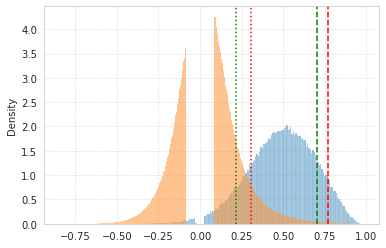

In [7]:
sns.histplot(net_ca.adj[net_ca.adj.nonzero()], color='C0', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

sns.histplot(net_bold.adj[net_bold.adj.nonzero()], color='C1', alpha=0.5, stat='density')
plt.axvline(net_bold.thresholds[10], color='g', ls=':')
plt.axvline(net_bold.thresholds[5], color='r', ls=':')

plt.show()

In [8]:
%%time

mice = Mice((256, 4), load_allen=True, load_parcel=True)

ca_dfs = mice.make_dfs('ca2')
bold_dfs = mice.make_dfs('bold')

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

CPU times: user 23.8 s, sys: 13.7 s, total: 37.4 s
Wall time: 43.2 s


In [9]:
%%time

net_ca = Network(
    mice=mice,
    key='sub-SLC08_ses-2_run-6',
    df=ca_dfs['sub-SLC08_ses-2_run-6'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

net_bold = Network(
    mice=mice,
    key='sub-SLC08_ses-2_run-6',
    df=bold_dfs['sub-SLC08_ses-2_run-6'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

[PROGRESS] fit: initiated

[PROGRESS] graphs: done

[PROGRESS] fit: done!

[PROGRESS] fit: initiated

[PROGRESS] graphs: done

[PROGRESS] fit: done!

CPU times: user 1min 58s, sys: 1min 35s, total: 3min 33s
Wall time: 3min 39s


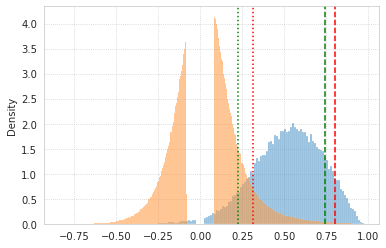

CPU times: user 4.61 s, sys: 74.9 ms, total: 4.68 s
Wall time: 4.67 s


In [10]:
%%time

sns.histplot(net_ca.adj[net_ca.adj.nonzero()], color='C0', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

sns.histplot(net_bold.adj[net_bold.adj.nonzero()], color='C1', alpha=0.5, stat='density')
plt.axvline(net_bold.thresholds[10], color='g', ls=':')
plt.axvline(net_bold.thresholds[5], color='r', ls=':')

plt.show()

In [11]:
x = ca_dfs['sub-SLC08_ses-2_run-6'].values
x.shape

(5500, 386)

In [17]:
nans = np.where(np.isnan(x).sum(0) > 0)[0]
x = np.delete(x, nans, axis=1)
x.shape

(5500, 324)

In [18]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(
    n_components=100,
    svd_solver='full',
).fit(x)

[<matplotlib.lines.Line2D object at 0x7fd87f6a3340>]

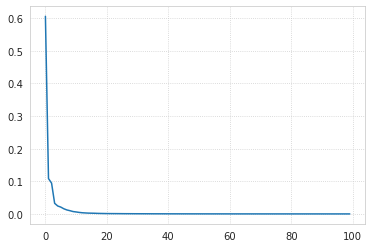

In [27]:
plt.plot(pca.explained_variance_ratio_)

In [28]:
pca.components_.shape

(100, 324)

In [29]:
y = pca.transform(x)
y.shape

(5500, 100)

[<matplotlib.lines.Line2D object at 0x7fd802c259a0>]

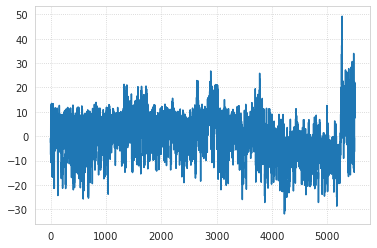

In [30]:
plt.plot(y[:, 0])

In [31]:
z = y.copy()
z[:, 0] = 0

x_inv = pca.inverse_transform(z)
x_inv.shape

(5500, 324)

In [33]:
df_new = pd.DataFrame(x_inv)
df_new.shape

(5500, 324)

In [35]:
a, p = get_adj_mat(df_new, 'pearson')

<matplotlib.colorbar.Colorbar object at 0x7fd858c5cd90>

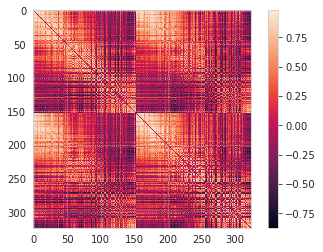

In [38]:
plt.imshow(a)
plt.colorbar()

<matplotlib.lines.Line2D object at 0x7fd87fa02730>

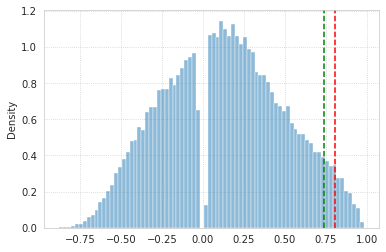

In [39]:
sns.histplot(a[a.nonzero()], color='C0', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

In [11]:
net.thresholds

{
    98: 0.0,
    39: 0.4596961313164675,
    38: 0.46755772154030734,
    37: 0.47538551495281406,
    36: 0.48314278498493396,
    35: 0.4908546803008632,
    34: 0.49850372856418645,
    33: 0.506194944039789,
    32: 0.5136423530178186,
    31: 0.520976073437181,
    30: 0.5284651184530391,
    29: 0.5361049080354121,
    28: 0.5436327397579448,
    27: 0.5512950480393234,
    26: 0.559196796603484,
    25: 0.5670990055912025,
    24: 0.5753843527531467,
    23: 0.5832870581209749,
    22: 0.5912638172552251,
    21: 0.5994104631201131,
    20: 0.6078178922959514,
    19: 0.6162389038161689,
    18: 0.6247950353278204,
    17: 0.6334174387610725,
    16: 0.6425657325779144,
    15: 0.6516203185650696,
    14: 0.6613518261007383,
    13: 0.6710841272312859,
    12: 0.6810881658135784,
    11: 0.6911960258655838,
    10: 0.7021876191664721,
    9: 0.7140151808982196,
    8: 0.7260408124425101,
    7: 0.7391410180842544,
    6: 0.7539200921370193,
    5: 0.7690181812588525,
    4: 0.7855247691201411,
    3: 0.8059617174147814,
    2: 0.8296872222403453,
    1: 0.8625828929968875
}

<matplotlib.colorbar.Colorbar object at 0x7fa72027d490>

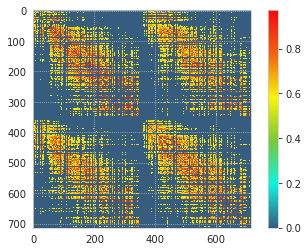

In [9]:
plt.imshow(net.adjacencies[31], cmap=net.style['cmap'])
plt.colorbar()

In [24]:
list(net.adjacencies)

[60, 49, 44, 40, 36, 31, 27, 23, 18, 14, 10]

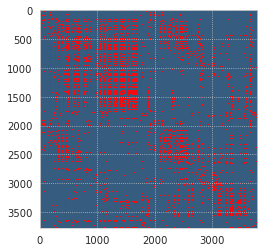

In [29]:
x = net.adjacencies[10].copy()
x[x.nonzero()] = 1
plt.imshow(x, cmap=net.style['cmap'])
plt.show()

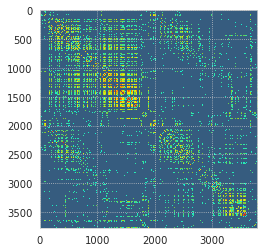

In [31]:
plt.imshow(net.adjacencies[10], cmap=net.style['cmap'])
plt.show()

In [ ]:
plt.imshow(net.adjacencies[10], cmap=net.style['cmap'])
plt.show()

In [34]:
list(net.l2n)[:15]

[
    '1-1-0',
    '1-1-1',
    '1-1-2',
    '1-1-3',
    '1-2-0',
    '1-2-1',
    '1-2-2',
    '1-3-0',
    '1-3-1',
    '1-3-2',
    '1-3-3',
    '1-4-0',
    '1-4-1',
    '1-4-2',
    '1-4-3'
]

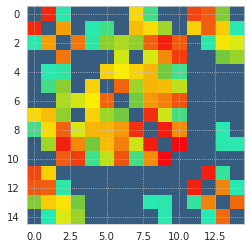

In [38]:
plt.imshow(net.adjacencies[10][:15][:, :15], cmap=net.style['cmap'])
plt.show()

In [45]:
net.set_percentiles(np.linspace(39, 1, 39), fit=False)

In [46]:
net._apply_thresholds()

In [47]:
net.thresholds

{
    39: 0.0,
    38: 0.0,
    37: 0.0,
    36: 0.0,
    35: 0.0,
    34: 0.0,
    33: 0.0,
    32: 0.0,
    31: 0.0,
    30: 0.0,
    29: 0.0,
    28: 0.08654204329874084,
    27: 0.09153389727785298,
    26: 0.09659859318672062,
    25: 0.10185478026645084,
    24: 0.10725231093893205,
    23: 0.11283949448491673,
    22: 0.11861724700840459,
    21: 0.1245859004785116,
    20: 0.1308128208160467,
    19: 0.1373160751033284,
    18: 0.14413159503511605,
    17: 0.1512302343411794,
    16: 0.15882949056106083,
    15: 0.1668067264055928,
    14: 0.17538187235224362,
    13: 0.18456917724749475,
    12: 0.19449683695954656,
    11: 0.205350498463946,
    10: 0.2172216889792347,
    9: 0.23044618121254315,
    8: 0.24525316018205426,
    7: 0.26225863988035447,
    6: 0.2820893186581125,
    5: 0.3057839987393555,
    4: 0.3354609953599896,
    3: 0.37488954593055895,
    2: 0.4317218264066186,
    1: 0.5261628433936266
}

<matplotlib.lines.Line2D object at 0x7f98b5b9a3d0>

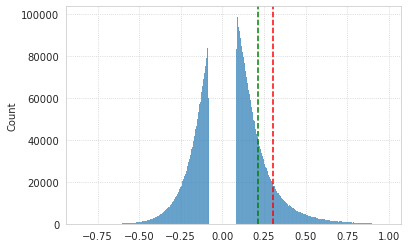

In [56]:
sns.histplot(net.adj[net.adj.nonzero()], color='C0')
plt.axvline(net.thresholds[10], color='g', ls='--')
plt.axvline(net.thresholds[5], color='r', ls='--')

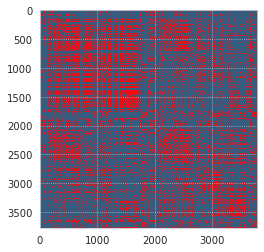

In [55]:
x = net.adjacencies[25].copy()
x[x.nonzero()] = 1
plt.imshow(x, cmap=net.style['cmap'])
plt.show()

In [3]:
df_stim = mice.load_stim_times('ca2')
df_stim

key 
 mode 
 task 
 timepoint 
 stim 
 
 
 
 
 0 
 sub-SLC01_ses-1_run-1 
 ca2 
 rest 
 500 
 0 
 
 
 1 
 sub-SLC01_ses-1_run-1 
 ca2 
 rest 
 501 
 0 
 
 
 2 
 sub-SLC01_ses-1_run-1 
 ca2 
 rest 
 502 
 0 
 
 
 3 
 sub-SLC01_ses-1_run-1 
 ca2 
 rest 
 503 
 0 
 
 
 4 
 sub-SLC01_ses-1_run-1 
 ca2 
 rest 
 504 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1154995 
 sub-SLC10_ses-3_run-7 
 ca2 
 rest 
 41995 
 0 
 
 
 1154996 
 sub-SLC10_ses-3_run-7 
 ca2 
 rest 
 41996 
 0 
 
 
 1154997 
 sub-SLC10_ses-3_run-7 
 ca2 
 rest 
 41997 
 0 
 
 
 1154998 
 sub-SLC10_ses-3_run-7 
 ca2 
 rest 
 41998 
 0 
 
 
 1154999 
 sub-SLC10_ses-3_run-7 
 ca2 
 rest 
 41999 
 0 
 
 
 
 1155000 rows × 5 columns

In [4]:
_df = df_stim.loc[df_stim['stim'] == 1]
_df = _df[_df['task'].values == 'rest']
_df

key 
 mode 
 task 
 timepoint 
 stim 
 
 
 
 
 236706 
 sub-SLC03_ses-1_run-2 
 ca2 
 rest 
 6706 
 1 
 
 
 236707 
 sub-SLC03_ses-1_run-2 
 ca2 
 rest 
 6707 
 1 
 
 
 236708 
 sub-SLC03_ses-1_run-2 
 ca2 
 rest 
 6708 
 1 
 
 
 236709 
 sub-SLC03_ses-1_run-2 
 ca2 
 rest 
 6709 
 1 
 
 
 236710 
 sub-SLC03_ses-1_run-2 
 ca2 
 rest 
 6710 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 582963 
 sub-SLC06_ses-1_run-1 
 ca2 
 rest 
 5963 
 1 
 
 
 582964 
 sub-SLC06_ses-1_run-1 
 ca2 
 rest 
 5964 
 1 
 
 
 582965 
 sub-SLC06_ses-1_run-1 
 ca2 
 rest 
 5965 
 1 
 
 
 582966 
 sub-SLC06_ses-1_run-1 
 ca2 
 rest 
 5966 
 1 
 
 
 582967 
 sub-SLC06_ses-1_run-1 
 ca2 
 rest 
 5967 
 1 
 
 
 
 1295 rows × 5 columns

In [5]:
_df['key'].unique()

array(['sub-SLC03_ses-1_run-2', 'sub-SLC03_ses-1_run-4',
       'sub-SLC03_ses-1_run-6', 'sub-SLC06_ses-1_run-1'], dtype=object)

In [6]:
df_stim = mice.load_stim_times('bold')
df_stim

key 
 mode 
 task 
 timepoint 
 stim 
 
 
 
 
 0 
 sub-SLC01_ses-1_run-1 
 bold 
 rest 
 50 
 0 
 
 
 1 
 sub-SLC01_ses-1_run-1 
 bold 
 rest 
 51 
 0 
 
 
 2 
 sub-SLC01_ses-1_run-1 
 bold 
 rest 
 52 
 0 
 
 
 3 
 sub-SLC01_ses-1_run-1 
 bold 
 rest 
 53 
 0 
 
 
 4 
 sub-SLC01_ses-1_run-1 
 bold 
 rest 
 54 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 115495 
 sub-SLC10_ses-3_run-7 
 bold 
 rest 
 4195 
 0 
 
 
 115496 
 sub-SLC10_ses-3_run-7 
 bold 
 rest 
 4196 
 0 
 
 
 115497 
 sub-SLC10_ses-3_run-7 
 bold 
 rest 
 4197 
 0 
 
 
 115498 
 sub-SLC10_ses-3_run-7 
 bold 
 rest 
 4198 
 0 
 
 
 115499 
 sub-SLC10_ses-3_run-7 
 bold 
 rest 
 4199 
 0 
 
 
 
 115500 rows × 5 columns

In [11]:
save_obj(dfs, 'test_ca', tmp_dir, 'npy')

[PROGRESS] 'test_ca.npy' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

'/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/test_ca.npy'

Warning, sub-SLC08_ses-1_run-1: 100 % of ROIs are nan. Moving on . . .

Warning, sub-SLC10_ses-2_run-1: 100 % of ROIs are nan. Moving on . . .

In [8]:
list(dfs)

[
    'sub-SLC01_ses-1_run-1',
    'sub-SLC01_ses-1_run-2',
    'sub-SLC01_ses-1_run-3',
    'sub-SLC01_ses-1_run-4',
    'sub-SLC01_ses-1_run-5',
    'sub-SLC01_ses-1_run-6',
    'sub-SLC01_ses-1_run-7',
    'sub-SLC01_ses-2_run-1',
    'sub-SLC01_ses-2_run-2',
    'sub-SLC01_ses-2_run-3',
    'sub-SLC01_ses-2_run-4',
    'sub-SLC01_ses-2_run-5',
    'sub-SLC01_ses-2_run-6',
    'sub-SLC01_ses-2_run-7',
    'sub-SLC01_ses-3_run-1',
    'sub-SLC01_ses-3_run-2',
    'sub-SLC01_ses-3_run-3',
    'sub-SLC01_ses-3_run-4',
    'sub-SLC01_ses-3_run-5',
    'sub-SLC01_ses-3_run-6',
    'sub-SLC01_ses-3_run-7',
    'sub-SLC02_ses-1_run-1',
    'sub-SLC02_ses-1_run-2',
    'sub-SLC02_ses-1_run-3',
    'sub-SLC02_ses-1_run-4',
    'sub-SLC02_ses-1_run-5',
    'sub-SLC02_ses-1_run-6',
    'sub-SLC02_ses-1_run-7',
    'sub-SLC02_ses-2_run-1',
    'sub-SLC02_ses-2_run-2',
    'sub-SLC02_ses-2_run-3',
    'sub-SLC02_ses-2_run-4',
    'sub-SLC02_ses-2_run-5',
    'sub-SLC02_ses-2_run-6',
    'sub-SLC02_ses-2_run-7',
    'sub-SLC02_ses-3_run-1',
    'sub-SLC02_ses-3_run-2',
    'sub-SLC02_ses-3_run-3',
    'sub-SLC02_ses-3_run-4',
    'sub-SLC02_ses-3_run-5',
    'sub-SLC02_ses-3_run-6',
    'sub-SLC02_ses-3_run-7',
    'sub-SLC03_ses-1_run-2',
    'sub-SLC03_ses-1_run-3',
    'sub-SLC03_ses-1_run-4',
    'sub-SLC03_ses-1_run-5',
    'sub-SLC03_ses-1_run-6',
    'sub-SLC03_ses-1_run-7',
    'sub-SLC03_ses-2_run-1',
    'sub-SLC03_ses-2_run-2',
    'sub-SLC03_ses-2_run-3',
    'sub-SLC03_ses-2_run-4',
    'sub-SLC03_ses-2_run-5',
    'sub-SLC03_ses-2_run-6',
    'sub-SLC03_ses-2_run-7',
    'sub-SLC03_ses-3_run-1',
    'sub-SLC03_ses-3_run-2',
    'sub-SLC03_ses-3_run-3',
    'sub-SLC03_ses-3_run-4',
    'sub-SLC03_ses-3_run-5',
    'sub-SLC03_ses-3_run-6',
    'sub-SLC03_ses-3_run-7',
    'sub-SLC04_ses-1_run-1',
    'sub-SLC04_ses-1_run-2',
    'sub-SLC04_ses-1_run-3',
    'sub-SLC04_ses-1_run-4',
    'sub-SLC04_ses-1_run-5',
    'sub-SLC04_ses-1_run-6',
    'sub-SLC04_ses-1_run-7',
    'sub-SLC04_ses-2_run-1',
    'sub-SLC04_ses-2_run-2',
    'sub-SLC04_ses-2_run-3',
    'sub-SLC04_ses-2_run-4',
    'sub-SLC04_ses-2_run-5',
    'sub-SLC04_ses-2_run-6',
    'sub-SLC04_ses-2_run-7',
    'sub-SLC04_ses-3_run-1',
    'sub-SLC04_ses-3_run-2',
    'sub-SLC04_ses-3_run-3',
    'sub-SLC04_ses-3_run-4',
    'sub-SLC04_ses-3_run-5',
    'sub-SLC04_ses-3_run-6',
    'sub-SLC04_ses-3_run-7',
    'sub-SLC05_ses-1_run-1',
    'sub-SLC05_ses-1_run-2',
    'sub-SLC05_ses-1_run-3',
    'sub-SLC05_ses-1_run-4',
    'sub-SLC05_ses-1_run-6',
    'sub-SLC05_ses-1_run-7',
    'sub-SLC05_ses-2_run-1',
    'sub-SLC05_ses-2_run-2',
    'sub-SLC05_ses-2_run-3',
    'sub-SLC05_ses-2_run-4',
    'sub-SLC05_ses-2_run-5',
    'sub-SLC05_ses-2_run-6',
    'sub-SLC05_ses-2_run-7',
    'sub-SLC05_ses-3_run-1',
    'sub-SLC05_ses-3_run-2',
    'sub-SLC05_ses-3_run-3',
    'sub-SLC05_ses-3_run-4',
    'sub-SLC05_ses-3_run-5',
    'sub-SLC05_ses-3_run-6',
    'sub-SLC05_ses-3_run-7',
    'sub-SLC06_ses-1_run-1',
    'sub-SLC06_ses-1_run-2',
    'sub-SLC06_ses-1_run-3',
    'sub-SLC06_ses-1_run-4',
    'sub-SLC06_ses-1_run-5',
    'sub-SLC06_ses-1_run-6',
    'sub-SLC06_ses-1_run-7',
    'sub-SLC06_ses-2_run-1',
    'sub-SLC06_ses-2_run-2',
    'sub-SLC06_ses-2_run-3',
    'sub-SLC06_ses-2_run-4',
    'sub-SLC06_ses-2_run-5',
    'sub-SLC06_ses-2_run-6',
    'sub-SLC06_ses-2_run-7',
    'sub-SLC06_ses-3_run-1',
    'sub-SLC06_ses-3_run-3',
    'sub-SLC06_ses-3_run-4',
    'sub-SLC06_ses-3_run-5',
    'sub-SLC06_ses-3_run-6',
    'sub-SLC06_ses-3_run-7',
    'sub-SLC07_ses-1_run-1',
    'sub-SLC07_ses-1_run-2',
    'sub-SLC07_ses-1_run-3',
    'sub-SLC07_ses-1_run-4',
    'sub-SLC07_ses-1_run-5',
    'sub-SLC07_ses-1_run-6',
    'sub-SLC07_ses-1_run-7',
    'sub-SLC07_ses-2_run-1',
    'sub-SLC07_ses-2_run-2',
    'sub-SLC07_ses-2_run-3',
    'sub-SLC07_ses-2_run-4',
    'sub-SLC07_ses-2_run-5',
    'sub-SLC07_ses-2_run-6',
    'sub-SLC07_ses-2_run-7',
    'sub-SLC07_ses-3_run-

In [9]:
dfs['sub-SLC08_ses-2_run-6']

1-1-0 
 1-1-1 
 1-1-2 
 1-1-3 
 1-2-0 
 1-2-1 
 1-2-2 
 1-3-0 
 1-3-1 
 1-3-2 
 ... 
 2-1117 
 2-1181 
 2-1190 
 2-1340 
 2-1348 
 2-1384 
 2-1468 
 2-1477 
 2-10703 
 2-10704 
 
 
 
 
 0 
 -1.526114 
 -1.123256 
 -0.384068 
 0.398320 
 0.082983 
 -0.707161 
 -0.358813 
 -0.813930 
 -0.571135 
 -0.539468 
 ... 
 0.006935 
 -0.018365 
 -0.690969 
 0.188608 
 0.041118 
 0.816416 
 0.206404 
 -0.083285 
 0.188996 
 0.212799 
 
 
 1 
 -0.999470 
 -0.771125 
 -0.221690 
 0.586310 
 0.250182 
 -0.421215 
 -0.333139 
 -0.591615 
 -0.501356 
 -0.565620 
 ... 
 0.281852 
 0.000083 
 -0.846453 
 0.015305 
 0.049020 
 2.272807 
 0.230961 
 -0.138889 
 0.207585 
 0.460202 
 
 
 2 
 -1.010709 
 -0.627812 
 -0.197740 
 -0.106970 
 0.005876 
 -0.255059 
 -0.169416 
 -0.906733 
 -0.566456 
 -0.433143 
 ... 
 0.547994 
 -0.063272 
 -0.513910 
 0.698663 
 0.114704 
 2.924990 
 0.204285 
 -0.114286 
 0.047973 
 0.682058 
 
 
 3 
 -1.050059 
 -0.673988 
 -0.412958 
 -0.651675 
 -0.406680 
 -0.108994 
 0.173293 
 -1.039044 
 -0.460769 
 -0.189692 
 ... 
 0.404444 
 -0.184238 
 -0.039965 
 0.850809 
 -0.335678 
 2.197589 
 0.330612 
 -0.425086 
 -0.032830 
 0.720847 
 
 
 4 
 -0.798570 
 -0.620100 
 -0.464803 
 -0.438617 
 0.243223 
 0.394169 
 0.651075 
 -0.257043 
 0.103588 
 0.154897 
 ... 
 0.014118 
 -0.170047 
 0.217204 
 0.313688 
 -0.769879 
 0.538688 
 0.081902 
 -0.848348 
 -0.052921 
 0.246625 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 545 
 -0.402011 
 -0.643295 
 -0.066193 
 0.660793 
 0.295265 
 -0.031912 
 0.544939 
 0.106300 
 0.052934 
 0.235667 
 ... 
 0.791342 
 -0.851664 
 -2.267433 
 2.267307 
 -0.373428 
 -0.617552 
 0.411402 
 0.508187 
 -0.141777 
 -0.521817 
 
 
 546 
 -0.579062 
 -0.840864 
 -0.724090 
 -0.168190 
 0.330755 
 0.015008 
 0.521496 
 -0.219729 
 -0.247686 
 -0.191756 
 ... 
 0.468948 
 -0.656950 
 -2.001564 
 2.154106 
 0.289062 
 -0.417544 
 0.256559 
 -0.025419 
 0.048044 
 -0.135234 
 
 
 547 
 -0.542173 
 -1.106811 
 -1.376066 
 -0.849939 
 0.688232 
 0.128497 
 0.697837 
 -0.401291 
 -0.446153 
 -0.697414 
 ... 
 0.232412 
 -0.563250 
 -2.134228 
 1.935040 
 0.694502 
 -0.655784 
 -0.000100 
 -0.321923 
 0.012765 
 -0.122355 
 
 
 548 
 -0.262104 
 -0.528175 
 -0.799930 
 -0.766228 
 1.309415 
 0.449718 
 0.913931 
 0.141753 
 0.194926 
 -0.227624 
 ... 
 0.297035 
 -0.530549 
 -2.137424 
 1.635887 
 0.628107 
 -0.988999 
 0.031894 
 -0.094146 
 -0.167899 
 -0.307497 
 
 
 549 
 -0.154618 
 -0.041488 
 0.066580 
 -0.032279 
 1.231055 
 0.552524 
 0.732715 
 0.651531 
 0.678365 
 0.462519 
 ... 
 0.386084 
 -0.473267 
 -1.169056 
 1.296440 
 0.365576 
 -1.096988 
 0.134120 
 0.194562 
 -0.227148 
 -0.318004 
 
 
 
 550 rows × 3776 columns

In [10]:
x = dfs['sub-SLC08_ses-2_run-6'].corr()
x = x.values
np.fill_diagonal(x, 0.)

<matplotlib.image.AxesImage object at 0x7f94de878be0>

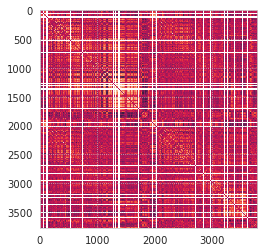

In [11]:
plt.imshow(x)

In [12]:
x.shape

(3776, 3776)

In [78]:
a, p = get_adj_mat(dfs['sub-SLC08_ses-2_run-6'], 'pearson')
aa, pp = get_adj_mat(dfs['sub-SLC08_ses-2_run-6'], 'spearman')

In [79]:
idxs_pears = np.where(np.abs(a).sum(0) == 0)[0]
idxs_spear = np.where(np.abs(aa).sum(0) == 0)[0]

In [80]:
a.shape, aa.shape

((3776, 3776), (3776, 3776))

<matplotlib.colorbar.Colorbar object at 0x7f933e4458b0>

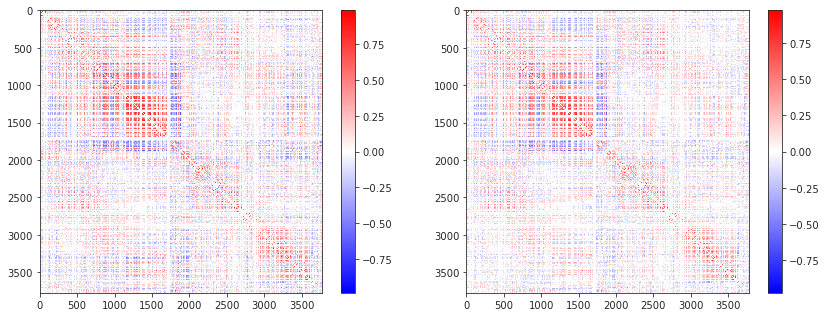

In [81]:
fig, axes = create_figure(1, 2, (12, 4.5))

vminmax = np.max(np.abs(a))
im = axes[0].imshow(a, cmap='bwr', vmin=-vminmax, vmax=vminmax)
plt.colorbar(im, ax=axes[0])

vminmax = np.max(np.abs(aa))
im = axes[1].imshow(aa, cmap='bwr', vmin=-vminmax, vmax=vminmax)
plt.colorbar(im, ax=axes[1])

<AxesSubplot:ylabel='Count'>

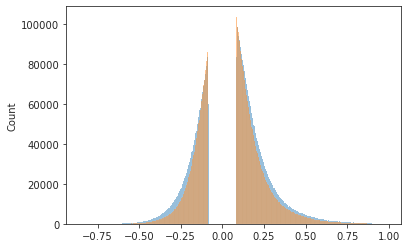

In [106]:
sns.histplot(a[a.nonzero()], color='C0', alpha=0.5)
sns.histplot(aa[aa.nonzero()], color='C1', alpha=0.5)

In [109]:
node_labels = dfs['sub-SLC08_ses-2_run-6'].columns.values

In [110]:
node_labels

[
    '1-1-0',
    '1-1-1',
    '1-1-2',
    '1-1-3',
    '1-2-0',
    '1-2-1',
    '1-2-2',
    '1-3-0',
    '1-3-1',
    '1-3-2',
    '1-3-3',
    '1-4-0',
    '1-4-1',
    '1-4-2',
    '1-4-3',
    '1-5-0',
    '1-5-1',
    '1-5-2',
    '1-6-0',
    '1-6-1',
    '1-6-2',
    '1-6-3',
    '1-7-0',
    '1-7-1',
    '1-7-2',
    '1-8-0',
    '1-8-1',
    '1-8-2',
    '1-9-0',
    '1-9-1',
    '1-9-2',
    '1-10-0',
    '1-10-1',
    '1-10-2',
    '1-10-3',
    '1-11-0',
    '1-11-1',
    '1-11-2',
    '1-12-0',
    '1-12-1',
    '1-12-2',
    '1-13-0',
    '1-13-1',
    '1-13-2',
    '1-14-0',
    '1-14-1',
    '1-15-0',
    '1-15-1',
    '1-15-2',
    '1-16-0',
    '1-16-1',
    '1-16-2',
    '1-17-0',
    '1-17-1',
    '1-17-2',
    '1-18-0',
    '1-18-1',
    '1-18-2',
    '1-19-0',
    '1-19-1',
    '1-19-2',
    '1-20-0',
    '1-20-1',
    '1-20-2',
    '1-21-0',
    '1-21-1',
    '1-22-0',
    '1-22-1',
    '1-22-2',
    '1-23-0',
    '1-23-1',
    '1-24-0',
    '1-24-1',
    '1-24-2',
    '1-25-0',
    '1-25-1',
    '1-26-0',
    '1-26-1',
    '1-26-2',
    '1-27-0',
    '1-27-1',
    '1-27-2',
    '1-28-0',
    '1-28-1',
    '1-28-2',
    '1-29-0',
    '1-29-1',
    '1-30-0',
    '1-30-1',
    '1-31-0',
    '1-31-1',
    '1-31-2',
    '1-32-0',
    '1-32-1',
    '1-32-2',
    '1-33-0',
    '1-33-1',
    '1-33-2',
    '1-33-3',
    '1-34-0',
    '1-34-1',
    '1-35-0',
    '1-35-1',
    '1-36-0',
    '1-36-1',
    '1-37-0',
    '1-37-1',
    '1-37-2',
    '1-37-3',
    '1-38-0',
    '1-38-1',
    '1-38-2',
    '1-39-0',
    '1-39-1',
    '1-39-2',
    '1-40-0',
    '1-40-1',
    '1-40-2',
    '1-41-0',
    '1-41-1',
    '1-41-2',
    '1-42-0',
    '1-42-1',
    '1-42-2',
    '1-43-0',
    '1-43-1',
    '1-44-0',
    '1-44-1',
    '1-44-2',
    '1-45-0',
    '1-46-0',
    '1-46-1',
    '1-47-0',
    '1-47-1',
    '1-47-2',
    '1-47-3',
    '1-48-0',
    '1-48-1',
    '1-48-2',
    '1-48-3',
    '1-49-0',
    '1-49-1',
    '1-49-2',
    '1-50-0',
    '1-50-1',
    '1-50-2',
    '1-51-0',
    '1-51-1',
    '1-51-2',
    '1-51-3',
    '1-52-0',
    '1-52-1',
    '1-53-0',
    '1-53-1',
    '1-53-2',
    '1-54-0',
    '1-54-1',
    '1-54-2',
    '1-54-3',
    '1-55-0',
    '1-55-1',
    '1-55-2',
    '1-56-0',
    '1-56-1',
    '1-57-0',
    '1-57-1',
    '1-58-0',
    '1-58-1',
    '1-58-2',
    '1-58-3',
    '1-59-0',
    '1-59-1',
    '1-60-0',
    '1-61-0',
    '1-62-0',
    '1-62-1',
    '1-62-2',
    '1-62-3',
    '1-63-0',
    '1-63-1',
    '1-63-2',
    '1-64-0',
    '1-64-1',
    '1-64-2',
    '1-64-3',
    '1-65-0',
    '1-65-1',
    '1-65-2',
    '1-65-3',
    '1-66-0',
    '1-66-1',
    '1-67-0',
    '1-67-1',
    '1-67-2',
    '1-67-3',
    '1-68-0',
    '1-68-1',
    '1-68-2',
    '1-68-3',
    '1-69-0',
    '1-69-1',
    '1-69-2',
    '1-70-0',
    '1-70-1',
    '1-70-2',
    '1-71-0',
    '1-71-1',
    '1-71-2',
    '1-72-0',
    '1-72-1',
    '1-73-0',
    '1-73-1',
    '1-73-2',
    '1-73-3',
    '1-74-0',
    '1-74-1',
    '1-75-0',
    '1-75-1',
    '1-76-0',
    '1-76-1',
    '1-76-2',
    '1-77-0',
    '1-78-0',
    '1-78-1',
    '1-78-2',
    '1-79-0',
    '1-79-1',
    '1-79-2',
    '1-79-3',
    '1-80-0',
    '1-80-1',
    '1-81-0',
    '1-81-1',
    '1-81-2',
    '1-81-3',
    '1-82-0',
    '1-82-1',
    '1-82-2',
    '1-82-3',
    '1-83-0',
    '1-83-1',
    '1-83-2',
    '1-83-3',
    '1-84-0',
    '1-84-1',
    '1-85-0',
    '1-85-1',
    '1-85-2',
    '1-85-3',
    '1-86-0',
    '1-86-1',
    '1-86-2',
    '1-87-0',
    '1-87-1',
    '1-87-2',
    '1-87-3',
    '1-88-0',
    '1-88-1',
    '1-88-2',
    '1-88-3',
    '1-89-0',
    '1-89-1',
    '1-89-2',
    '1-89-3',
    '1-90-0',
    '1-90-1',
    '1-90-2',
    '1-91-0',
    '1-91-1',
    '1-91-2',
    '1-91-3',
    '1-92-0',
    '1-92-1',
    '1-92-2',
    '1-93-0',
    '1-93-1',
    '1-93-2',
    '1-94-0',
    '1-94-1',
    '1-95-0',
    '1-95-1',
    '1-95-2',
    '1-95-3',
    '1-96-0',
    '1-96-1',
    '1-97-0',
    '1-97-1',
    '1-98-0

In [112]:
n2l = {i: lbl for i, lbl in enumerate(node_labels)}
l2n = {lbl: i for i, lbl in n2l.items()}

In [113]:
n2l

{
    0: '1-1-0',
    1: '1-1-1',
    2: '1-1-2',
    3: '1-1-3',
    4: '1-2-0',
    5: '1-2-1',
    6: '1-2-2',
    7: '1-3-0',
    8: '1-3-1',
    9: '1-3-2',
    10: '1-3-3',
    11: '1-4-0',
    12: '1-4-1',
    13: '1-4-2',
    14: '1-4-3',
    15: '1-5-0',
    16: '1-5-1',
    17: '1-5-2',
    18: '1-6-0',
    19: '1-6-1',
    20: '1-6-2',
    21: '1-6-3',
    22: '1-7-0',
    23: '1-7-1',
    24: '1-7-2',
    25: '1-8-0',
    26: '1-8-1',
    27: '1-8-2',
    28: '1-9-0',
    29: '1-9-1',
    30: '1-9-2',
    31: '1-10-0',
    32: '1-10-1',
    33: '1-10-2',
    34: '1-10-3',
    35: '1-11-0',
    36: '1-11-1',
    37: '1-11-2',
    38: '1-12-0',
    39: '1-12-1',
    40: '1-12-2',
    41: '1-13-0',
    42: '1-13-1',
    43: '1-13-2',
    44: '1-14-0',
    45: '1-14-1',
    46: '1-15-0',
    47: '1-15-1',
    48: '1-15-2',
    49: '1-16-0',
    50: '1-16-1',
    51: '1-16-2',
    52: '1-17-0',
    53: '1-17-1',
    54: '1-17-2',
    55: '1-18-0',
    56: '1-18-1',
    57: '1-18-2',
    58: '1-19-0',
    59: '1-19-1',
    60: '1-19-2',
    61: '1-20-0',
    62: '1-20-1',
    63: '1-20-2',
    64: '1-21-0',
    65: '1-21-1',
    66: '1-22-0',
    67: '1-22-1',
    68: '1-22-2',
    69: '1-23-0',
    70: '1-23-1',
    71: '1-24-0',
    72: '1-24-1',
    73: '1-24-2',
    74: '1-25-0',
    75: '1-25-1',
    76: '1-26-0',
    77: '1-26-1',
    78: '1-26-2',
    79: '1-27-0',
    80: '1-27-1',
    81: '1-27-2',
    82: '1-28-0',
    83: '1-28-1',
    84: '1-28-2',
    85: '1-29-0',
    86: '1-29-1',
    87: '1-30-0',
    88: '1-30-1',
    89: '1-31-0',
    90: '1-31-1',
    91: '1-31-2',
    92: '1-32-0',
    93: '1-32-1',
    94: '1-32-2',
    95: '1-33-0',
    96: '1-33-1',
    97: '1-33-2',
    98: '1-33-3',
    99: '1-34-0',
    100: '1-34-1',
    101: '1-35-0',
    102: '1-35-1',
    103: '1-36-0',
    104: '1-36-1',
    105: '1-37-0',
    106: '1-37-1',
    107: '1-37-2',
    108: '1-37-3',
    109: '1-38-0',
    110: '1-38-1',
    111: '1-38-2',
    112: '1-39-0',
    113: '1-39-1',
    114: '1-39-2',
    115: '1-40-0',
    116: '1-40-1',
    117: '1-40-2',
    118: '1-41-0',
    119: '1-41-1',
    120: '1-41-2',
    121: '1-42-0',
    122: '1-42-1',
    123: '1-42-2',
    124: '1-43-0',
    125: '1-43-1',
    126: '1-44-0',
    127: '1-44-1',
    128: '1-44-2',
    129: '1-45-0',
    130: '1-46-0',
    131: '1-46-1',
    132: '1-47-0',
    133: '1-47-1',
    134: '1-47-2',
    135: '1-47-3',
    136: '1-48-0',
    137: '1-48-1',
    138: '1-48-2',
    139: '1-48-3',
    140: '1-49-0',
    141: '1-49-1',
    142: '1-49-2',
    143: '1-50-0',
    144: '1-50-1',
    145: '1-50-2',
    146: '1-51-0',
    147: '1-51-1',
    148: '1-51-2',
    149: '1-51-3',
    150: '1-52-0',
    151: '1-52-1',
    152: '1-53-0',
    153: '1-53-1',
    154: '1-53-2',
    155: '1-54-0',
    156: '1-54-1',
    157: '1-54-2',
    158: '1-54-3',
    159: '1-55-0',
    160: '1-55-1',
    161: '1-55-2',
    162: '1-56-0',
    163: '1-56-1',
    164: '1-57-0',
    165: '1-57-1',
    166: '1-58-0',
    167: '1-58-1',
    168: '1-58-2',
    169: '1-58-3',
    170: '1-59-0',
    171: '1-59-1',
    172: '1-60-0',
    173: '1-61-0',
    174: '1-62-0',
    175: '1-62-1',
    176: '1-62-2',
    177: '1-62-3',
    178: '1-63-0',
    179: '1-63-1',
    180: '1-63-2',
    181: '1-64-0',
    182: '1-64-1',
    183: '1-64-2',
    184: '1-64-3',
    185: '1-65-0',
    186: '1-65-1',
    187: '1-65-2',
    188: '1-65-3',
    189: '1-66-0',
    190: '1-66-1',
    191: '1-67-0',
    192: '1-67-1',
    193: '1-67-2',
    194: '1-67-3',
    195: '1-68-0',
    196: '1-68-1',
    197: '1-68-2',
    198: '1-68-3',
    199: '1-69-0',
    200: '1-69-1',
    201: '1-69-2',
    202: '1-70-0',
    203: '1-70-1',
    204: '1-70-2',
    205: '1-71-0',
    206: '1-71-1',
    207: '1-71-2',
    208: '1-72-0',
    209: '1-72-1',
    210: '1-73-0',
    211: '1-73-1',
    212: '1-73-2',
    213: '1-73-3',
    214: '1-74-0',
    215: '1-74-1',
    216: '1-75-0',
    217: '1-75-1

In [10]:
dfs = mice.make_dfs('ca2')

In [12]:
y = dfs['sub-SLC08_ses-2_run-6'].corr()
y = y.values
np.fill_diagonal(y, 0.)

<matplotlib.image.AxesImage object at 0x7fbeade45c70>

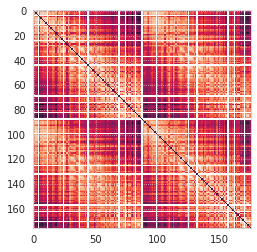

In [13]:
plt.imshow(y)

In [21]:
np.isnan(y).sum(1)

array([175,  17,  17,  17, 175,  17,  17,  17,  17,  17,  17, 175,  17,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17, 175,  17,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17, 175,  17,
        17,  17,  17,  17,  17, 175,  17,  17,  17,  17,  17,  17,  17,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,
        17,  17,  17,  17, 175,  17,  17,  17,  17, 175,  17,  17,  17,
        17,  17,  17,  17, 175,  17,  17,  17,  17, 175, 175,  17,  17,
        17,  17,  17,  17,  17,  17,  17,  17, 175,  17,  17,  17,  17,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,
        17,  17,  17,  17,  17,  17,  17,  17, 175,  17,  17,  17,  17,
        17,  17, 175,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,
        17, 175,  17,  17,  17,  17, 175,  17,  17,  17,  17,  17,  17,
        17, 175,  17,  17,  17,  17,  17])

In [22]:
aaa = np.where(np.isnan(y).sum(1) > 100)[0]
aaa

array([  0,   4,  11,  24,  37,  44,  69,  74,  82,  87,  88,  99, 125,
       132, 157, 162, 170])

In [27]:
bbb = dfs['sub-SLC08_ses-2_run-6'].columns[aaa]
bbb

Index(['1-4-0', '1-14-0', '1-24-0', '1-43-0', '1-63-0', '1-72-0', '1-107-0',
       '1-112-0', '1-120-0', '1-126-0', '2-4-0', '2-24-0', '2-63-0', '2-72-0',
       '2-107-0', '2-112-0', '2-120-0'],
      dtype='object')

In [28]:
ca_func = mice.ca['sub-SLC08_ses-2_run-6'].get_data()

In [29]:
{k: v for k, v in ca_func.items() if k in bbb}

{
    '1-4-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-14-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-24-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-43-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-63-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-72-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-107-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-112-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-120-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '1-126-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-4-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-24-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-63-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-72-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-107-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-112-0': array([nan, nan, nan, ..., nan, nan, nan]),
    '2-120-0': array([nan, nan, nan, ..., nan, nan, nan])
}

<AxesSubplot:ylabel='Count'>

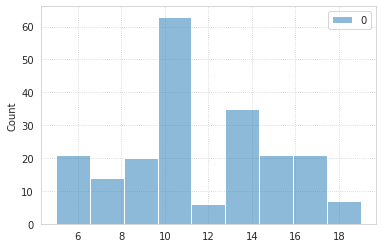

In [29]:
sns.histplot(perc_missing.values())

In [14]:
mice.setup_func_data()

In [31]:
x = mice.ca['sub-SLC01_ses-2_run-3'].get_data()

In [32]:
list(x)

[
    '1-4-0',
    '1-10-0',
    '1-12-0',
    '1-13-0',
    '1-14-0',
    '1-15-0',
    '1-17-0',
    '1-19-0',
    '1-20-0',
    '1-21-0',
    '1-22-0',
    '1-24-0',
    '1-26-0',
    '1-27-0',
    '1-28-0',
    '1-29-0',
    '1-33-0',
    '1-34-0',
    '1-35-0',
    '1-36-0',
    '1-37-0',
    '1-39-0',
    '1-41-0',
    '1-42-0',
    '1-43-0',
    '1-45-0',
    '1-46-0',
    '1-48-0',
    '1-49-0',
    '1-50-0',
    '1-53-0',
    '1-54-0',
    '1-55-0',
    '1-57-0',
    '1-58-0',
    '1-59-0',
    '1-61-0',
    '1-63-0',
    '1-64-0',
    '1-65-0',
    '1-67-0',
    '1-68-0',
    '1-70-0',
    '1-71-0',
    '1-72-0',
    '1-74-0',
    '1-75-0',
    '1-76-0',
    '1-78-0',
    '1-79-0',
    '1-81-0',
    '1-82-0',
    '1-84-0',
    '1-85-0',
    '1-86-0',
    '1-88-0',
    '1-90-0',
    '1-92-0',
    '1-93-0',
    '1-94-0',
    '1-95-0',
    '1-96-0',
    '1-97-0',
    '1-98-0',
    '1-101-0',
    '1-102-0',
    '1-103-0',
    '1-104-0',
    '1-105-0',
    '1-107-0',
    '1-108-0',
    '1-109-0',
    '1-110-0',
    '1-111-0',
    '1-112-0',
    '1-113-0',
    '1-114-0',
    '1-115-0',
    '1-116-0',
    '1-117-0',
    '1-118-0',
    '1-119-0',
    '1-120-0',
    '1-121-0',
    '1-122-0',
    '1-123-0',
    '1-125-0',
    '1-126-0',
    '2-4-0',
    '2-10-0',
    '2-12-0',
    '2-13-0',
    '2-14-0',
    '2-15-0',
    '2-17-0',
    '2-19-0',
    '2-20-0',
    '2-21-0',
    '2-22-0',
    '2-24-0',
    '2-26-0',
    '2-27-0',
    '2-28-0',
    '2-29-0',
    '2-33-0',
    '2-34-0',
    '2-35-0',
    '2-36-0',
    '2-37-0',
    '2-39-0',
    '2-41-0',
    '2-42-0',
    '2-43-0',
    '2-45-0',
    '2-46-0',
    '2-48-0',
    '2-49-0',
    '2-50-0',
    '2-53-0',
    '2-54-0',
    '2-55-0',
    '2-57-0',
    '2-58-0',
    '2-59-0',
    '2-61-0',
    '2-63-0',
    '2-64-0',
    '2-65-0',
    '2-67-0',
    '2-68-0',
    '2-70-0',
    '2-71-0',
    '2-72-0',
    '2-74-0',
    '2-75-0',
    '2-76-0',
    '2-78-0',
    '2-79-0',
    '2-81-0',
    '2-82-0',
    '2-84-0',
    '2-85-0',
    '2-86-0',
    '2-88-0',
    '2-90-0',
    '2-92-0',
    '2-93-0',
    '2-94-0',
    '2-95-0',
    '2-96-0',
    '2-97-0',
    '2-98-0',
    '2-101-0',
    '2-102-0',
    '2-103-0',
    '2-104-0',
    '2-105-0',
    '2-107-0',
    '2-108-0',
    '2-109-0',
    '2-110-0',
    '2-111-0',
    '2-112-0',
    '2-113-0',
    '2-114-0',
    '2-115-0',
    '2-116-0',
    '2-117-0',
    '2-118-0',
    '2-119-0',
    '2-120-0',
    '2-121-0',
    '2-122-0',
    '2-123-0',
    '2-125-0',
    '2-126-0'
]

In [33]:
def _reindex_fn(s):
    vals = tuple(map(lambda e: int(e), s.split('-')))
    i = int(vals[0] * 2e9) + vals[-1]
    if len(vals) == 3:
        i += int(vals[1] * 10)
    return i + int(6e6 / len(vals))

In [34]:
sorted(x, key=_reindex_fn)

[
    '1-4-0',
    '1-10-0',
    '1-12-0',
    '1-13-0',
    '1-14-0',
    '1-15-0',
    '1-17-0',
    '1-19-0',
    '1-20-0',
    '1-21-0',
    '1-22-0',
    '1-24-0',
    '1-26-0',
    '1-27-0',
    '1-28-0',
    '1-29-0',
    '1-33-0',
    '1-34-0',
    '1-35-0',
    '1-36-0',
    '1-37-0',
    '1-39-0',
    '1-41-0',
    '1-42-0',
    '1-43-0',
    '1-45-0',
    '1-46-0',
    '1-48-0',
    '1-49-0',
    '1-50-0',
    '1-53-0',
    '1-54-0',
    '1-55-0',
    '1-57-0',
    '1-58-0',
    '1-59-0',
    '1-61-0',
    '1-63-0',
    '1-64-0',
    '1-65-0',
    '1-67-0',
    '1-68-0',
    '1-70-0',
    '1-71-0',
    '1-72-0',
    '1-74-0',
    '1-75-0',
    '1-76-0',
    '1-78-0',
    '1-79-0',
    '1-81-0',
    '1-82-0',
    '1-84-0',
    '1-85-0',
    '1-86-0',
    '1-88-0',
    '1-90-0',
    '1-92-0',
    '1-93-0',
    '1-94-0',
    '1-95-0',
    '1-96-0',
    '1-97-0',
    '1-98-0',
    '1-101-0',
    '1-102-0',
    '1-103-0',
    '1-104-0',
    '1-105-0',
    '1-107-0',
    '1-108-0',
    '1-109-0',
    '1-110-0',
    '1-111-0',
    '1-112-0',
    '1-113-0',
    '1-114-0',
    '1-115-0',
    '1-116-0',
    '1-117-0',
    '1-118-0',
    '1-119-0',
    '1-120-0',
    '1-121-0',
    '1-122-0',
    '1-123-0',
    '1-125-0',
    '1-126-0',
    '2-4-0',
    '2-10-0',
    '2-12-0',
    '2-13-0',
    '2-14-0',
    '2-15-0',
    '2-17-0',
    '2-19-0',
    '2-20-0',
    '2-21-0',
    '2-22-0',
    '2-24-0',
    '2-26-0',
    '2-27-0',
    '2-28-0',
    '2-29-0',
    '2-33-0',
    '2-34-0',
    '2-35-0',
    '2-36-0',
    '2-37-0',
    '2-39-0',
    '2-41-0',
    '2-42-0',
    '2-43-0',
    '2-45-0',
    '2-46-0',
    '2-48-0',
    '2-49-0',
    '2-50-0',
    '2-53-0',
    '2-54-0',
    '2-55-0',
    '2-57-0',
    '2-58-0',
    '2-59-0',
    '2-61-0',
    '2-63-0',
    '2-64-0',
    '2-65-0',
    '2-67-0',
    '2-68-0',
    '2-70-0',
    '2-71-0',
    '2-72-0',
    '2-74-0',
    '2-75-0',
    '2-76-0',
    '2-78-0',
    '2-79-0',
    '2-81-0',
    '2-82-0',
    '2-84-0',
    '2-85-0',
    '2-86-0',
    '2-88-0',
    '2-90-0',
    '2-92-0',
    '2-93-0',
    '2-94-0',
    '2-95-0',
    '2-96-0',
    '2-97-0',
    '2-98-0',
    '2-101-0',
    '2-102-0',
    '2-103-0',
    '2-104-0',
    '2-105-0',
    '2-107-0',
    '2-108-0',
    '2-109-0',
    '2-110-0',
    '2-111-0',
    '2-112-0',
    '2-113-0',
    '2-114-0',
    '2-115-0',
    '2-116-0',
    '2-117-0',
    '2-118-0',
    '2-119-0',
    '2-120-0',
    '2-121-0',
    '2-122-0',
    '2-123-0',
    '2-125-0',
    '2-126-0'
]

In [3]:
from register.register import Register
reg = Register(mice)

In [ ]:
reg.organize_func(0.1)

logger 'organize_func_(2021_10_12).log' created at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*2/log

Name: cortex-merged . . . a total of 176 regions were accepted.
accept ratio: 85 %, reject ratio: 15 %, using a presence threshold of 10.0 %

organizing ca2:  sub-SLC07_ses-2_run-7:  66%|██████▌   | 139/210 [1:03:47<34:58, 29.55s/it]

In [12]:
reg.set_mode('3d')
acc = reg.get_accepted_regions(0.1)
{k: len(v) for k, v in acc.items()}

Name: cortex-merged . . . a total of 5368 regions were accepted.
accept ratio: 98 %, reject ratio: 2 %, using a presence threshold of 10.0 %

Name: subcortex-l . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

Name: subcortex-r . . . a total of 154 regions were accepted.
accept ratio: 100 %, reject ratio: 0 %, using a presence threshold of 10.0 %

{'cortex-merged': 5368, 'subcortex-l': 154, 'subcortex-r': 154, 'subcortex': 154}

In [13]:
cor3d = acc['cortex-merged']

In [14]:
reg.set_mode('2d')
acc2 = reg.get_accepted_regions(0.1)
{k: len(v) for k, v in acc2.items()}

cor2d = acc2['cortex-merged']

Name: cortex-merged . . . a total of 1020 regions were accepted.
accept ratio: 72 %, reject ratio: 28 %, using a presence threshold of 10.0 %

In [15]:
[i for i in cor2d if i not in cor3d]

[]

In [26]:
thres = 0.1

regions_all = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        key = mice.get_key(sub, ses)
        mask = mice.mask3d[key].load_ants('unsigned int')
        mask = mask.numpy().astype(bool)
        obj = reg.load_obj_masks(key)
        x = obj['cortex-merged'].numpy()
        x *= mask
        regions = np.unique(x[x.nonzero()])
        regions_all[key] = sorted(regions)

regions_agg = []
for item in regions_all.values():
    regions_agg += item
freq = collections.Counter(regions_agg)
freq = {
    i: v / len(regions_all)
    for i, v in freq.items()
}
freq = {
    i: freq.get(i, 0.0) for i in
    mice.parcel.complement(list(freq))
}

rej = dict(filter(
    lambda t: t[1] < thres,
    freq.items()
))
rej = mice.parcel.complement(sorted(rej))
acc = [
    i for i in freq
    if i not in rej
]

msg = '\n\n'
msg += f"Name: {'cortex-merged'} . . . a total of {len(acc)} regions were accepted.\n"
msg += f"accept ratio: {100 * len(acc) / len(freq):0.0f} %, "
msg += f"reject ratio: {100 * len(rej) / len(freq):0.0f} %, "
msg += f"using a presence threshold of {0.1 * 100} %\n"

print(msg)

Name: cortex-merged . . . a total of 5368 regions were accepted.
accept ratio: 98 %, reject ratio: 2 %, using a presence threshold of 10.0 %

Name: cortex-merged . . . a total of 5368 regions were accepted.
accept ratio: 98 %, reject ratio: 2 %, using a presence threshold of 10.0 %

<AxesSubplot:ylabel='Proportion'>

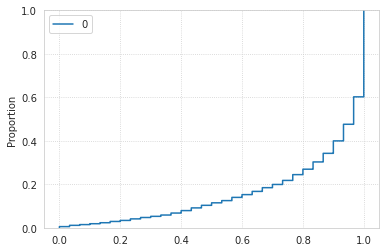

In [12]:
sns.ecdfplot(freq.values())

In [4]:

list(obj)

['cortex-merged', 'subcortex-l', 'subcortex-r', 'CH']

array([   1,    2,    3, ..., 6074, 6079, 6098], dtype=uint32)

In [ ]:
regions_all = {}


[PROGRESS] fit columnar: initiated

[PROGRESS] downsample: done

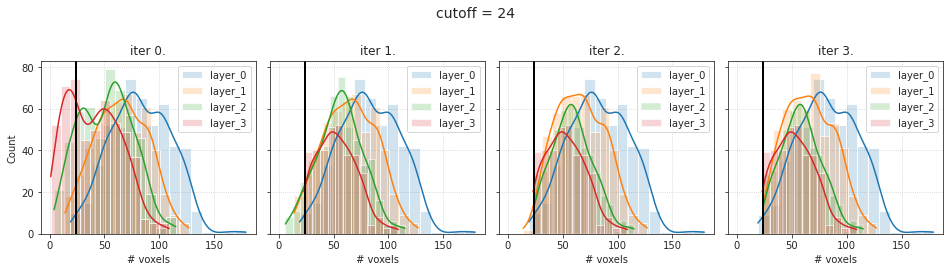

[PROGRESS] merge: done

Warning, region '163' is flat

Warning, region '178' is flat

Warning, region '193' is flat

[PROGRESS] erode: done

num merged regions,     left: 923,  right: 923
region id diff,         r - l:  Counter({1024: 923})

[PROGRESS] fit columnar: done

[PROGRESS] 'parcel_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

[PROGRESS] save results: done.

In [3]:
mice.parcel.fit_parcel(True, cutoff=3)

In [4]:
from register.register import Register
reg = Register(mice)

In [5]:
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|██████████| 30/30 [14:13<00:00, 28.44s/it]


In [6]:
reg.organize_func()

organizing bold:  sub-SLC01_ses-2_run-1:   3%|▎         | 7/210 [01:39<46:21, 13.70s/it]  /home/hadi/Dropbox/git/_Ca-fMRI/register/register.py:827: RuntimeWarning:

Mean of empty slice.

/home/hadi/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning:

invalid value encountered in true_divide



Warnin! doing sub-SLC01_ses-2_run-1, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-2:   4%|▍         | 8/210 [01:53<45:49, 13.61s/it]

Warnin! doing sub-SLC01_ses-2_run-2, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-3:   4%|▍         | 9/210 [02:06<45:16, 13.51s/it]

Warnin! doing sub-SLC01_ses-2_run-3, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-4:   5%|▍         | 10/210 [02:20<45:01, 13.51s/it]

Warnin! doing sub-SLC01_ses-2_run-4, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-5:   5%|▌         | 11/210 [02:32<44:00, 13.27s/it]

Warnin! doing sub-SLC01_ses-2_run-5, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-6:   6%|▌         | 12/210 [02:45<43:37, 13.22s/it]

Warnin! doing sub-SLC01_ses-2_run-6, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-7:   6%|▌         | 13/210 [02:58<42:50, 13.05s/it]

Warnin! doing sub-SLC01_ses-2_run-7, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC04_ses-2_run-1:  33%|███▎      | 70/210 [13:11<30:54, 13.25s/it]

Warnin! doing sub-SLC04_ses-2_run-1, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-2:  34%|███▍      | 71/210 [13:24<30:42, 13.26s/it]

Warnin! doing sub-SLC04_ses-2_run-2, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-3:  34%|███▍      | 72/210 [13:37<30:24, 13.22s/it]

Warnin! doing sub-SLC04_ses-2_run-3, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-4:  35%|███▍      | 73/210 [13:50<30:08, 13.20s/it]

Warnin! doing sub-SLC04_ses-2_run-4, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-5:  35%|███▌      | 74/210 [14:03<29:47, 13.14s/it]

Warnin! doing sub-SLC04_ses-2_run-5, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-6:  36%|███▌      | 75/210 [14:16<29:36, 13.16s/it]

Warnin! doing sub-SLC04_ses-2_run-6, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-7:  36%|███▌      | 76/210 [14:30<29:29, 13.20s/it]

Warnin! doing sub-SLC04_ses-2_run-7, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC07_ses-3_run-1:  67%|██████▋   | 140/210 [29:10<16:26, 14.09s/it]

Warnin! doing sub-SLC07_ses-3_run-1, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-2:  67%|██████▋   | 141/210 [29:24<16:10, 14.06s/it]

Warnin! doing sub-SLC07_ses-3_run-2, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-3:  68%|██████▊   | 142/210 [29:37<15:36, 13.77s/it]

Warnin! doing sub-SLC07_ses-3_run-3, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-4:  68%|██████▊   | 143/210 [29:50<15:19, 13.72s/it]

Warnin! doing sub-SLC07_ses-3_run-4, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-5:  69%|██████▊   | 144/210 [30:05<15:17, 13.90s/it]

Warnin! doing sub-SLC07_ses-3_run-5, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-6:  69%|██████▉   | 145/210 [30:20<15:24, 14.22s/it]

Warnin! doing sub-SLC07_ses-3_run-6, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-7:  70%|██████▉   | 146/210 [30:35<15:27, 14.49s/it]

Warnin! doing sub-SLC07_ses-3_run-7, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC08_ses-1_run-1:  70%|███████   | 147/210 [30:49<15:02, 14.33s/it]

Warnin! doing sub-SLC08_ses-1_run-1, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-2:  70%|███████   | 148/210 [31:03<14:38, 14.17s/it]

Warnin! doing sub-SLC08_ses-1_run-2, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-3:  71%|███████   | 149/210 [31:17<14:33, 14.32s/it]

Warnin! doing sub-SLC08_ses-1_run-3, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-4:  71%|███████▏  | 150/210 [31:32<14:29, 14.49s/it]

Warnin! doing sub-SLC08_ses-1_run-4, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-5:  72%|███████▏  | 151/210 [31:46<14:05, 14.33s/it]

Warnin! doing sub-SLC08_ses-1_run-5, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-6:  72%|███████▏  | 152/210 [31:59<13:23, 13.86s/it]

Warnin! doing sub-SLC08_ses-1_run-6, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC10_ses-3_run-7: 100%|██████████| 210/210 [45:30<00:00, 13.00s/it]


In [3]:
path = '/home/hadi/Documents/workspaces/allen/MouseConnectivity/cortical_coordinates'
sorted(os.listdir(path))

[
    'dorsal_flatmap_paths_10.h5',
    'isocortex_boundary_10.nrrd',
    'laplacian_10.nrrd',
    'top_view_paths_10.h5'
]

In [5]:
laplacian, laplacian_header = nrrd.read(pjoin(path, 'laplacian_10.nrrd'))

In [6]:
laplacian.shape

(1320, 800, 1140)

In [7]:
laplacian_header

OrderedDict([('type', 'float'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([1320,  800, 1140])), ('space directions', array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])

<matplotlib.image.AxesImage object at 0x7f3297ac18b0>

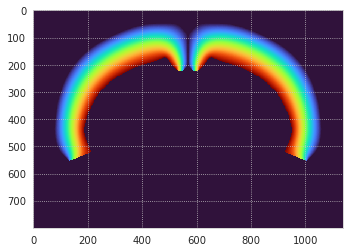

In [10]:
plt.imshow(laplacian[600], cmap='turbo')

In [11]:
boundary, boundary_header = nrrd.read(pjoin(path, 'isocortex_boundary_10.nrrd'))

In [22]:
import h5py

In [45]:
with h5py.File(pjoin(path, 'top_view_paths_10.h5'), 'r') as f:
    paths = np.array(f['paths'])
    view = np.array(f['view lookup'])
paths.shape, view.shape

((713732, 200), (1320, 1140))

<matplotlib.colorbar.Colorbar object at 0x7f3296611790>

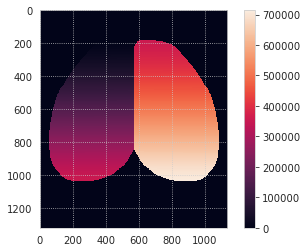

In [53]:
plt.imshow(view)
plt.colorbar()

In [51]:
with h5py.File(pjoin(path, 'dorsal_flatmap_paths_10.h5'), 'r') as f:
    dorsal_paths = np.array(f['paths'])
    dorsal_view = np.array(f['view lookup'])
dorsal_paths.shape, dorsal_view.shape

((2029520, 200), (1360, 2720))

<matplotlib.image.AxesImage object at 0x7f329664e970>

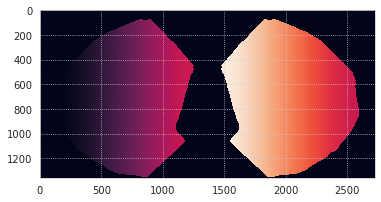

In [52]:
plt.imshow(dorsal_view)